In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter

import seaborn
#seaborn.reset_orig()
seaborn.set()
rc('text', usetex=True)

# PGI MAG Single-Physics

In [2]:
pgi_mag_log = open('../pgi-magnetic/FINAL_DepthWeighting/pgi_mag.log','r')
num_lines = sum(1 for line in open('../pgi-magnetic/FINAL_DepthWeighting/pgi_mag.log'))

i = 0
phid = [3.65e+08]
phipetro = [0.]
alphas = [1]
beta = []
iteration = []
while i < num_lines:
    i+=1
    line = pgi_mag_log.readline()
    line = line.split()
    try:
        itr = int(line[0])
        beta.append(float(line[1]))
        iteration.append(itr)
    except:
        pass
    if len(line)>0:
        if line[0] == 'geophys.':
            phid.append(float(line[2]))
            # Scale back from the chiSmall set in the inversion
            phipetro.append(2.*float(line[9]))
    
        if line[0] == 'Warming':
            alphas.append(float(line[-1]))
    
    if len(alphas)<len(iteration):
        alphas.append(alphas[-1])

Text(0.5, 0, 'Iteration')

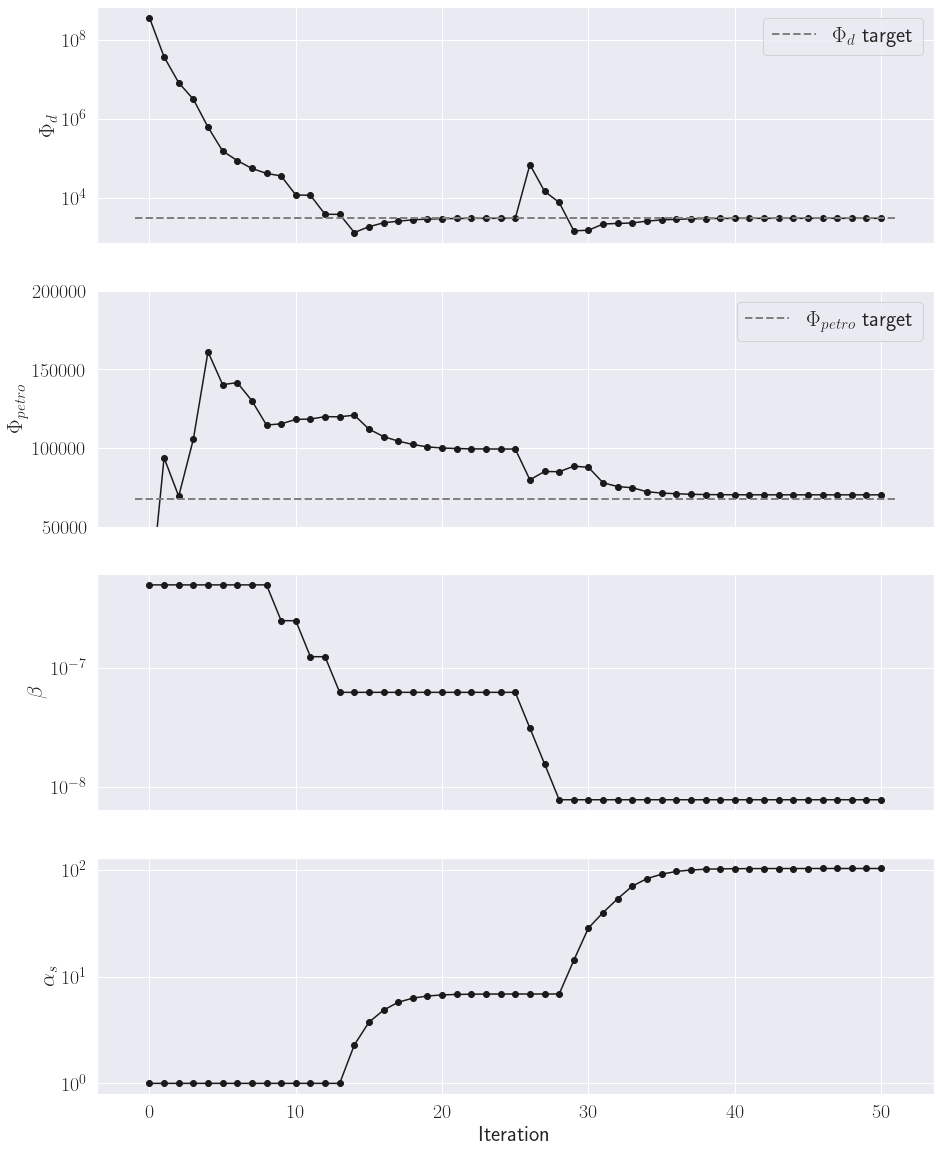

In [3]:
titlesize=24
labelsize=22
ticksize=20

fig, ax = plt.subplots(4,1,figsize=(15,20), sharex=True)
for axx, ls in zip(ax,[phid, phipetro,beta,alphas]):
    axx.plot(iteration,ls,c='k',marker='o')
    axx.tick_params(labelsize=ticksize)

ax[0].set_yscale('log')
ax[0].plot([-1,51],[3010,3010],linestyle='--',c='grey', linewidth=2, label='$\Phi_d$ target')
ax[0].legend(fontsize=labelsize)
ax[0].set_ylabel(r'$\Phi_d$',fontsize=labelsize)

#ax[1].set_yscale('log')
#ax[1].set_yticks([30000,50000,70000,90000])

ax[1].plot([-1,51],[67972.0,67972.0],linestyle='--',c='grey', linewidth=2, label='$\Phi_{petro}$ target')
ax[1].legend(fontsize=labelsize)
ax[1].set_ylabel(r'$\Phi_{{petro}}$',fontsize=labelsize)
ax[1].set_ylim([5e4,2e5])

ax[2].set_ylabel(r'$\beta$',fontsize=labelsize)
ax[2].set_yscale('log')

ax[3].set_ylabel(r'$\alpha_s$',fontsize=labelsize)
ax[3].set_yscale('log')

ax[3].set_xlabel('Iteration',fontsize=labelsize)

In [4]:
fig.savefig('pgi-mag-convergence-curves.png', dpi=200,bbox_inches='tight', pad_inches=0.1)

# PGI Gravity Single Physics

In [5]:
pgi_grav_log = open('../pgi-gravity//FINAL_DepthWeighting/pgi-grav-dw.log','r')
num_lines = sum(1 for line in open('../pgi-gravity//FINAL_DepthWeighting/pgi-grav-dw.log'))

i = 0
phid = [1.73e+06]
phipetro = [0.]
alphas = [1]
beta = []
iteration = []
while i < num_lines:
    i+=1
    line = pgi_grav_log.readline()
    line = line.split()
    try:
        itr = int(line[0])
        beta.append(float(line[1]))
        iteration.append(itr)
    except:
      pass
    if len(line)>0:
        if line[0] == 'geophys.':
            phid.append(float(line[2]))
            phipetro.append(float(line[9]))
    
        if line[0] == 'Warming':
            alphas.append(float(line[-1]))
    
    if len(alphas)<len(iteration):
        alphas.append(alphas[-1])

Text(0.5, 0, 'Iteration')

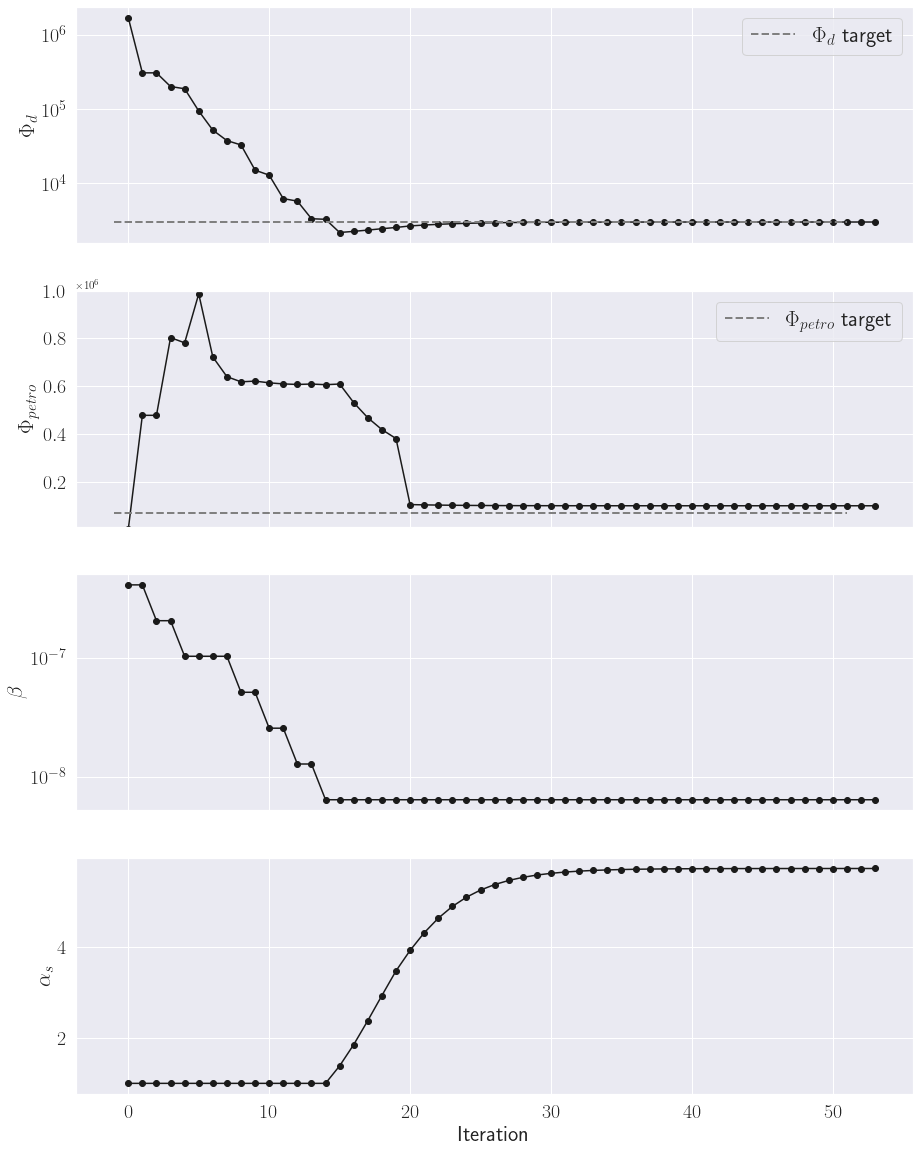

In [6]:
titlesize=24
labelsize=22
ticksize=20

fig, ax = plt.subplots(4,1,figsize=(15,20), sharex=True)
for axx, ls in zip(ax,[phid, phipetro,beta,alphas]):
    axx.plot(iteration,ls,c='k',marker='o')
    axx.tick_params(labelsize=ticksize)

ax[0].set_yscale('log')
ax[0].plot([-1,51],[3010,3010],linestyle='--',c='grey', linewidth=2, label='$\Phi_d$ target')
ax[0].legend(fontsize=labelsize)
ax[0].set_ylabel(r'$\Phi_d$',fontsize=labelsize)

#ax[1].set_yscale('log')
#ax[1].set_yticks([30000,50000,70000,90000])
ax[1].plot([-1,51],[67972.0,67972.0],linestyle='--',c='grey', linewidth=2, label='$\Phi_{petro}$ target')
ax[1].legend(fontsize=labelsize)
ax[1].set_ylabel(r'$\Phi_{{petro}}$',fontsize=labelsize)
ax[1].set_ylim([1e4,1e6])

ax[2].set_ylabel(r'$\beta$',fontsize=labelsize)
ax[2].set_yscale('log')

ax[3].set_ylabel(r'$\alpha_s$',fontsize=labelsize)
#ax[3].set_yscale('log')
#ax[3].set_ylim([0.9,11])

ax[3].set_xlabel('Iteration',fontsize=labelsize)

In [7]:
fig.savefig('pgi-grav-convergence-curves.png', dpi=200,bbox_inches='tight', pad_inches=0.1)